**Import all the required files**

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


Let’s load the Kaggle dataset into a Pandas data frame:

In [39]:
data = pd.read_csv("data.csv")

**Exploratory Data Analysis**

In [40]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [41]:
data.shape

(4600, 18)

In [42]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [43]:
data.columns


Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [44]:
data.isnull().sum()


date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [45]:
np.round(data.describe(), 2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00
mean,551962.99,3.40,2.16,2139.35,14852.52,1.51,0.01,0.24,3.45,1827.27,312.08,1970.79,808.61
std,563834.70,0.91,0.78,963.21,35884.44,0.54,0.08,0.78,0.68,862.17,464.14,29.73,979.41
min,0.00,0.00,0.00,370.00,638.00,1.00,0.00,0.00,1.00,370.00,0.00,1900.00,0.00
25%,322875.00,3.00,1.75,1460.00,5000.75,1.00,0.00,0.00,3.00,1190.00,0.00,1951.00,0.00
50%,460943.46,3.00,2.25,1980.00,7683.00,1.50,0.00,0.00,3.00,1590.00,0.00,1976.00,0.00
75%,654962.50,4.00,2.50,2620.00,11001.25,2.00,0.00,0.00,4.00,2300.00,610.00,1997.00,1999.00
max,26590000.00,9.00,8.00,13540.00,1074218.00,3.50,1.00,4.00,5.00,9410.00,4820.00,2014.00,2014.00


Seaborn Heatmap for Visualising Data Correlations
Heatmaps are a great way to visually summarise tabular data we can easily identify trends and outliers within our dataset

In [46]:
cor=data.corr()
cor

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


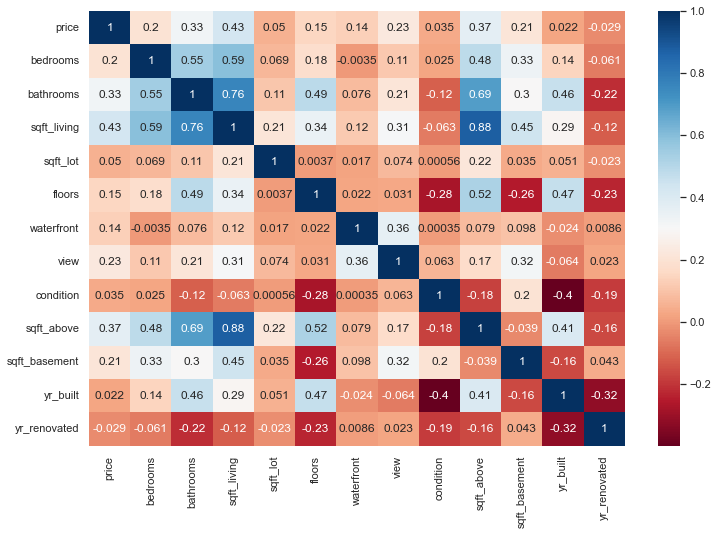

In [47]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(data.corr(), annot=True,cmap='RdBu');

Seaborn heatmap for a correlation matrix after specifying a custom colourmap.

**converting data form categorical data to numerical data**

In [48]:
ci=pd.get_dummies(data['city'])
#st=pd.get_dummies(data['street'])
co=pd.get_dummies(data['country'])
state=pd.get_dummies(data['statezip'])

**Split the data**

In [49]:
y = data.price.values
data = data.drop(['price'], axis = 1)
data = data.drop(['date','street','city','statezip','country'], axis = 1)
data=pd.concat([data,state,ci,co],axis=1)
X = data.to_numpy()
colnames = data.columns

In [50]:
X_train, X_test,Y_train, Y_test = train_test_split(X,y,test_size=0.25, random_state=0)

Train our modelS

In [51]:
%time
lr = LinearRegression()
lr.fit(X_train, Y_train)

CPU times: total: 0 ns
Wall time: 0 ns


LinearRegression()

In [52]:
pred = lr.predict(X_test)

**Evaluation**

In [53]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,pred)
score

0.7235442213023581

In [54]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))

Mean Absolute Error: 114478.77620449262
Mean Squared Error: 39472396912.91993
Root Mean Squared Error: 198676.61390541145


In [55]:
from sklearn.linear_model import ( Ridge, Lasso)


**Lasso Regression**

In [56]:
%time
la=Lasso()
la.fit(X_train, Y_train)
pred = la.predict(X_test)
la.score(X_test,Y_test)

CPU times: total: 0 ns
Wall time: 0 ns


C:\Users\91704\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.669e+14, tolerance: 1.298e+11
  model = cd_fast.enet_coordinate_descent(


0.7235647576342306

**Ridge Regression**

In [57]:
%time
ri=Ridge(alpha = 20.0)
ri.fit(X_train, Y_train)
pred = ri.predict(X_test)
ri.score(X_test,Y_test)

CPU times: total: 0 ns
Wall time: 0 ns


0.7053829290016818